Quick Sort Time 1: [0.0, 0.0009965896606445312, 0.11269855499267578, 0.43017125129699707, 1.77024245262146]
Bucket Time: [0.0, 0.0010001659393310547, 0.0019910335540771484, 0.0029921531677246094, 0.009974002838134766]
Quick Sort Time 2: [0.0, 0.0019919872283935547, 0.1296532154083252, 0.48669934272766113, 1.7574760913848877]
Radix Time: [0.030917882919311523, 0.24238181114196777, 2.316179037094116, 4.354279279708862, 9.048945188522339]


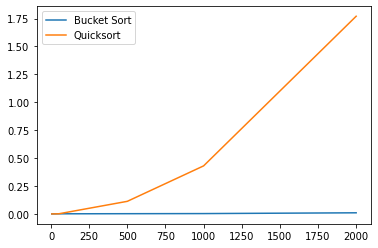

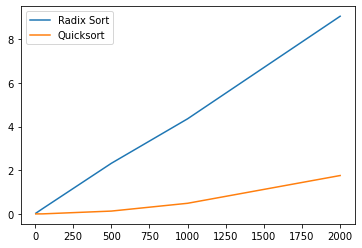

In [2]:
import time
import math
import matplotlib.pyplot as plt
import numpy as np


############ Quick Sort ############
def partition(A,p,r) :
    x = A[r]
    i = p-1
    for j in range(p,r):
        if A[j] <= x:
            i = i+1
            A[i],A[j] = A[j],A[i]
    A[i+1],A[r] = A[r],A[i+1]
    return i+1

def quickSort (A,p,r):
    if p < r :
        q = partition(A,p,r)
        quickSort(A,p,q-1)
        quickSort(A,q+1,r)
############ Quick Sort ############   
############ Bucket Sort ############
def insertionSort(Arr):
    # Check Length of Input
    if int(len(Arr)) > 1 :
        i = 1

        #Loop for each index of Array
        while i < len(Arr):
            Arr_Val = Arr[i]    
            j = i-1

            #check all the previous values compared to A[i]
            while j >= 0 and Arr_Val < Arr[j] :
                Arr[j+1] = Arr[j]
                j = j-1
            
            Arr[j+1] = Arr_Val
            i = i+1          

def bucketSort(A):
    B = []
    n = len(A)
    for i in range(0,n-1):
        B.append([])
        
    for i in A:
        B[math.floor((n-1)*i)].append(i)
        
    for i in range(0,n-1):
        insertionSort(B[i])
        
    k = 0
    for i in range (0,n-1):
        for j in range (0,len(B[i])):
            A[k] = B[i][j]
            k = k + 1
############ Bucket Sort ############
############ Counting Sort ##########
def countingSort(A,B,k):
    C = []
    k= k+1

    for i in range(0,k):
        C.append(0)
        
    for j in range(0,len(A)):
        C[A[j]] = C[A[j]] + 1
        
    for i in range(1,k):
        C[i] = C[i]+C[i-1]

    for j in range(len(A)-1,-1,-1):
        B[C[A[j]]-1] = A[j]
        C[A[j]] = C[A[j]] - 1
        #print(j)
        #print(f'B[]={B}')
        #print(f'C[]={C}')
############ Counting Sort ##########
############ Radix Sort ############
def countingSortRadix(A,exp):
    
    C = [0] * 10 
    n = len(A)
    B = [0] * n
    
    for i in range(0, n): 
        index = (A[i]/exp) 
        C[int((index)%10)] = C[int((index)%10)] + 1
        
    for i in range(1,10): 
        C[i] = C[i] + C[i-1]
    
    for j in range(len(A)-1,-1,-1):
        index = (A[j]/exp) 
        B[C[int((index)%10) ] - 1] = A[j] 
        C[int((index)%10)] = C[int((index)%10)] - 1
        
    for i in range(0,len(A)): 
        A[i] = B[i] 
        
        
def radixSort(A):
    maxA_digits = max(A) #Find maximum number to get maximum digits
    
    exp = 1
    while maxA_digits/exp > 0:
        countingSortRadix(A,exp)
        exp = exp * 10
############ Radix Sort ############
############ Time Recording ########
def record_time():
    
# Bucket sort
    for A in A_list_bucket:
        time_start = time.time()
        bucketSort(A)
        total_time = time.time() - time_start
        bucket_time.append(total_time)
    # Quick sort for bucket sort
    for A in A_list_bucket_quick:
        time_start = time.time()
        quickSort(A, 0, len(A)-1)
        total_time = time.time() - time_start
        quick_bucket_time.append(total_time)
    
    # Radix sort
    for A in A_list_radix:
        time_start = time.time()
        radixSort(A)
        total_time = time.time() - time_start
        radix_time.append(total_time)
    # Quick sort for radix sort
    for A in A_list_radix_quick:
        time_start = time.time()
        quickSort(A, 0, len(A)-1)
        total_time = time.time() - time_start
        quick_radix_time.append(total_time)

###########################################
# arr1 = [ 0.77, 0.56, 0.01, 0.5001, 0.999, 0.23]
# arr2 = [ 0.77, 0.56, 0.01, 0.5001, 0.999, 0.23]
# arr3 = [111, 1111, 1, 11111, 1, 3, 4, 7]

# print(f'Array for Bucket Sort: {arr1}')
# print(f'Array for Quick Sort: {arr2}')
# print(f'Array for Counting Sort: {arr3}')

# bucketSort(arr1)
# quickSort(arr2,0,len(arr2)-1)
# B = [0] * len(arr3)
# #countingSort(arr3,B,max(arr3))
# radixSort(arr3)

# print('#'*30)
# print(f'Bucket Sorted: {arr1}')
# print(f'Quick Sorted: {arr2}')
# #print(f'Counting Sorted: {arr3}')
# #print(f'Radix Sorted: {arr3}')
####### Time Recording
n = [5, 50, 500, 1000, 2000]

A_list_bucket = []
A_list_radix = []

for i in n:
    # Bucket sort
    A_bucket = np.random.uniform(0, 1, i)
    A_list_bucket.append(A_bucket)
    
    # Radix sort 
    A_radix = np.random.randint(0, 10000, i)
    A_list_radix.append(A_radix)
    
A_list_bucket_quick = A_list_bucket
A_list_radix_quick = A_list_radix

##### List of time spending
radix_time = []
quick_radix_time = []
bucket_time = []
quick_bucket_time = []

record_time()
print(f'Quick Sort Time 1: {quick_bucket_time}')
print(f'Bucket Time: {bucket_time}')
print(f'Quick Sort Time 2: {quick_radix_time}')
print(f'Radix Time: {radix_time}')

#Plot the graph
fig = plt.figure()
p = fig.add_subplot(1,1,1)
p.plot(n, bucket_time, label='Bucket Sort')
p.plot(n, quick_bucket_time, label='Quicksort')
p.legend(loc='best')

fig2 = plt.figure()
p2 = fig2.add_subplot(1,1,1)
p2.plot(n, radix_time, label='Radix Sort')
p2.plot(n, quick_radix_time, label='Quicksort')
p2.legend()




